In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

# Getting and converting the data

The following data comes from the [BIWI head pose dataset](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db), thanks to Gabriele Fanelli et al. We have converted the images to jpeg format.( The following steps are copied and pasted from fastaiV3 course).

In [5]:
path = untar_data(URLs.BIWI_HEAD_POSE)
path.ls()

[PosixPath('/root/.fastai/data/biwi_head_pose/01'),
 PosixPath('/root/.fastai/data/biwi_head_pose/04'),
 PosixPath('/root/.fastai/data/biwi_head_pose/10'),
 PosixPath('/root/.fastai/data/biwi_head_pose/08.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/14'),
 PosixPath('/root/.fastai/data/biwi_head_pose/20.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/03'),
 PosixPath('/root/.fastai/data/biwi_head_pose/21'),
 PosixPath('/root/.fastai/data/biwi_head_pose/05'),
 PosixPath('/root/.fastai/data/biwi_head_pose/22.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/19.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/15.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/02.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/12.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/18.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/05.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/11.obj'),
 PosixPath('/root/.fastai/data/biwi_head_pose/09'),
 PosixPath('/root/.fasta

In [6]:
cal = np.genfromtxt(path/'01'/'rgb.cal',skip_footer = 6);cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [0]:
fname = '09/frame_00667_rgb.jpg'

In [0]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

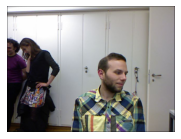

In [9]:
img = open_image(path/fname)
img.show()

In [10]:
ctr = np.genfromtxt(img2txt_name(fname),skip_header=3);ctr

array([187.332 ,  40.3892, 893.135 ])

In [0]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c2,c1])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [12]:
get_ctr(fname)
#This is the coordinate of the point

tensor([263.9104, 428.5814])

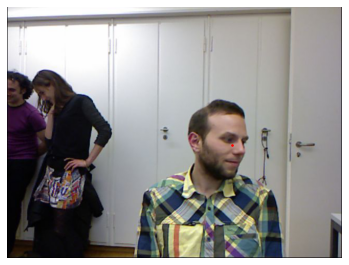

In [13]:
ctr = get_ctr(fname)
img.show(y=get_ip(img, ctr), figsize=(6, 6))

# Creating a dataset

In [0]:
data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name == '13')
        .label_from_func(get_ctr)
        .transform(get_transforms(),tfm_y=True,size=(120,160))
        .databunch().normalize(imagenet_stats)
)

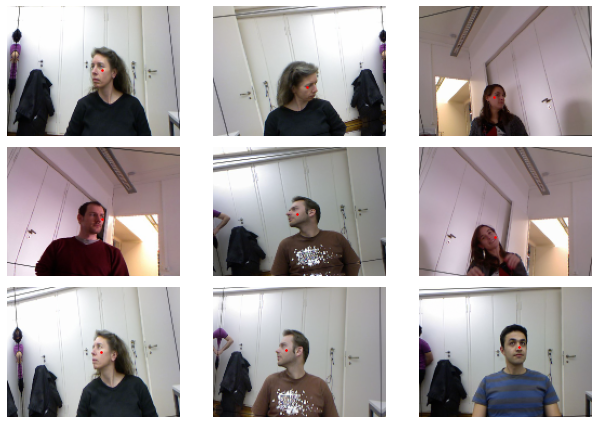

In [15]:
data.show_batch(rows =3,figsize=(9,6))

# Train Model

In [16]:
learn = cnn_learner(data,models.resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


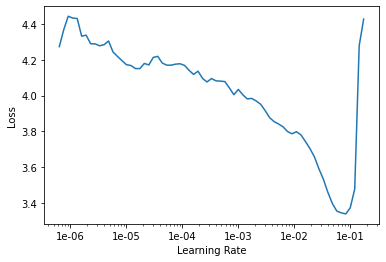

In [21]:
learn.recorder.plot()

In [0]:
lr = 1e-2

In [23]:
learn.fit_one_cycle(5,slice(lr))

epoch,train_loss,valid_loss,time
0,0.218496,0.011594,02:55
1,0.076758,0.004334,02:54
2,0.029098,0.014505,02:56
3,0.013585,0.002173,02:58
4,0.009036,0.002132,03:00


[Discriminative Layer Training](https://docs.fast.ai/basic_train.html#Discriminative-layer-training)
- If you pass just slice(end) then the last group's learning rate is end, and all the other groups are end/10. 



In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

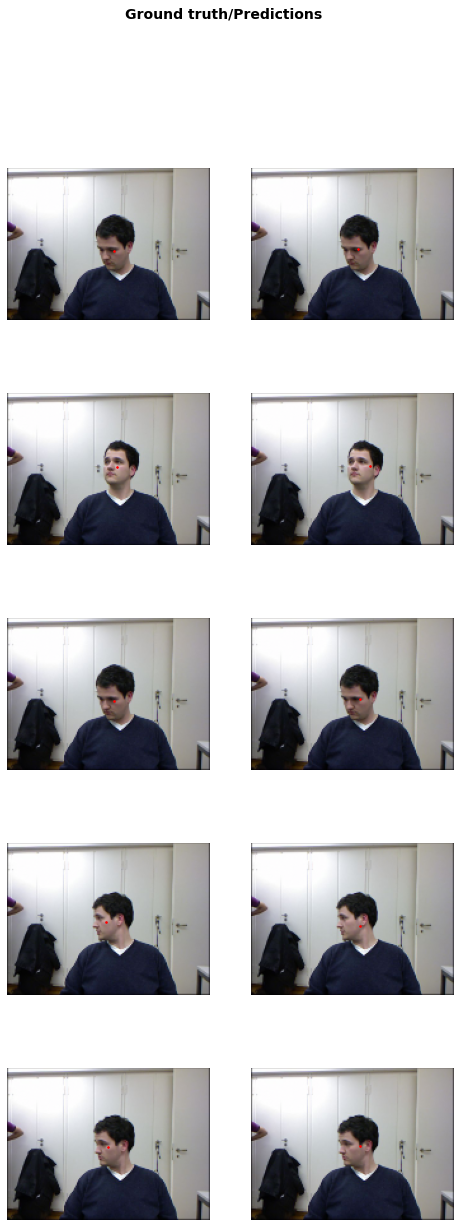

In [26]:
learn.show_results()